### Task 3: Cross-Country Comparison

This notebook synthesizes cleaned solar datasets from **Benin**, **Sierra Leone**, and **Togo** to evaluate relative solar potential across countries.

We will:
- Load cleaned CSV datasets
- Compare key solar metrics: GHI, DNI, DHI via boxplots
- Summarize descriptive statistics (mean, median, std)
- Perform one-way ANOVA test on GHI values
- Present key observations
- (Bonus) Visual ranking of countries by average GHI


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [17]:
class SolarDataComparison:
    """
    A class to load solar datasets from multiple countries,
    perform descriptive statistics, visualizations, and statistical tests.
    """
    
    def __init__(self, file_paths: dict):
        """
        Initialize the class with dictionary of country:file_path.
        Loads and combines data.
        
        Args:
            file_paths (dict): Keys are country names, values are csv file paths.
        """
        self.file_paths = file_paths
        self.df = self._load_all_data()
    
    def _load_all_data(self):
        """
        Loads data for each country, adds a 'Country' column, and concatenates.
        
        Returns:
            pd.DataFrame: Combined dataframe with all countries' data.
        """
        dfs = []
        for country, path in self.file_paths.items():
            data = pd.read_csv(path)
            data['Country'] = country
            dfs.append(data)
        combined_df = pd.concat(dfs, ignore_index=True)
        return combined_df
    
    def plot_boxplot(self, metric: str):
        """
        Plots a boxplot of the specified solar metric by country.
        
        Args:
            metric (str): Column name of metric to plot (e.g., 'GHI', 'DNI', 'DHI').
        """
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Country', y=metric, data=self.df, palette="Set2")
        plt.title(f"{metric} Comparison Across Countries")
        plt.xlabel("Country")
        plt.ylabel(f"{metric} (W/m²)")
        plt.grid(True)
        plt.show()
    
    def summary_statistics(self):
        """
        Computes mean, median, and standard deviation of GHI, DNI, and DHI grouped by country.
        
        Returns:
            pd.DataFrame: Multi-index dataframe with descriptive stats.
        """
        stats = self.df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(['mean', 'median', 'std'])
        return stats.round(2)
    
    def perform_anova(self, metric: str):
        """
        Performs one-way ANOVA on a given metric across countries.
        
        Args:
            metric (str): Column name for ANOVA test (e.g., 'GHI').
            
        Returns:
            tuple: F-statistic and p-value of the ANOVA test.
        """
        groups = [self.df[self.df['Country'] == country][metric].dropna() for country in self.df['Country'].unique()]
        f_stat, p_val = f_oneway(*groups)
        print(f"One-way ANOVA for {metric}: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")
        return f_stat, p_val
    
    def plot_ghi_ranking(self):
        """
        Plots a horizontal bar chart ranking countries by average GHI.
        """
        avg_ghi = self.df.groupby("Country")["GHI"].mean().sort_values(ascending=False)
        plt.figure(figsize=(6, 4))
        sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")
        plt.xlabel("Average GHI (W/m²)")
        plt.title("Country Ranking by Average GHI")
        plt.grid(True)
        plt.show()
        
    def plot_ghi_ranking(self):
        """
        Plots a horizontal bar chart ranking countries by average GHI.
        """
        avg_ghi = self.df.groupby("Country")["GHI"].mean().sort_values(ascending=False)
        plt.figure(figsize=(6, 4))
        # Use a single color instead of palette to avoid the warning
        sns.barplot(x=avg_ghi.values, y=avg_ghi.index, color="mediumseagreen")
        plt.xlabel("Average GHI (W/m²)")
        plt.title("Country Ranking by Average GHI")
        plt.grid(True)
        plt.show()

In [8]:
# Load Data and Create Instance
# File paths dictionary 
file_paths = {
    "Benin": "data/benin_clean.csv",
    "Sierra Leone": "data/sierraleone_clean.csv",
    "Togo": "data/togo_clean.csv"
}

# Create instance
solar_comparison = SolarDataComparison(file_paths)

C:\Users\Mewal\AppData\Local\Temp\ipykernel_12780\4007573178.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=self.df, palette="Set2")


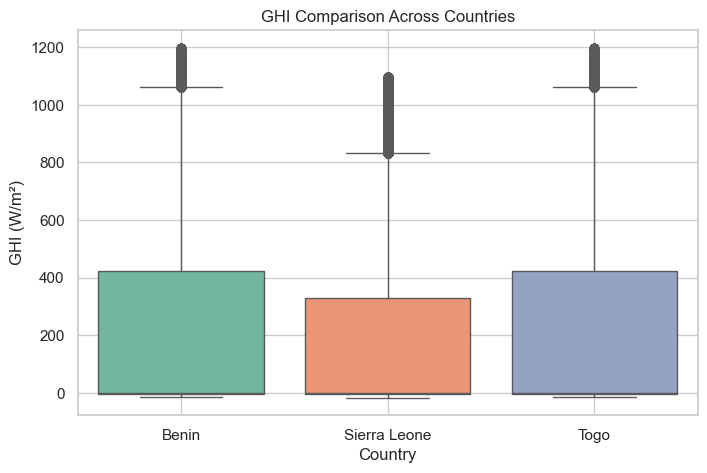

C:\Users\Mewal\AppData\Local\Temp\ipykernel_12780\4007573178.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=self.df, palette="Set2")


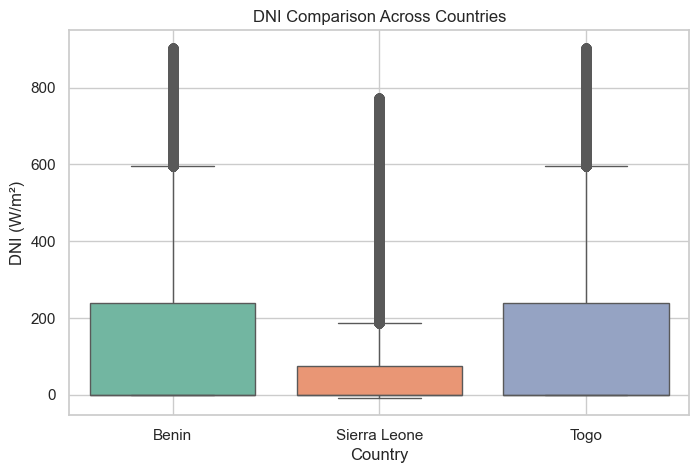

C:\Users\Mewal\AppData\Local\Temp\ipykernel_12780\4007573178.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=self.df, palette="Set2")


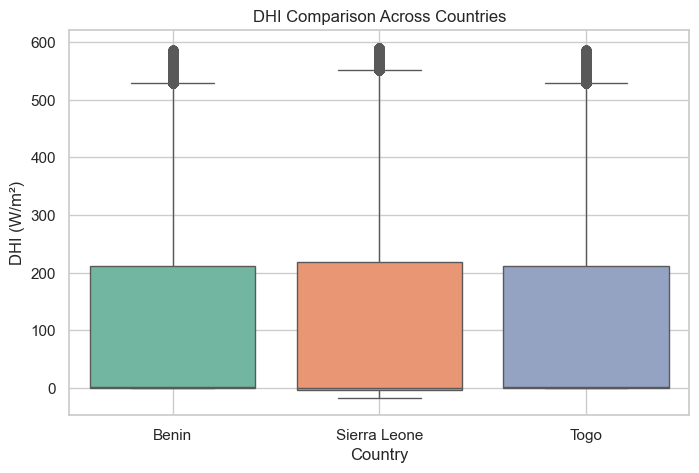

In [11]:
# Boxplots of GHI, DNI, and DHI
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    solar_comparison.plot_boxplot(metric)

In [12]:
#Summary Statistics Table
summary_stats = solar_comparison.summary_statistics()
summary_stats

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   
Sierra Leone  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   -0.6   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         151.57  
Sierra Leone  153.69  
Togo          151.57

In [13]:
#Statistical Testing: One-way ANOVA on GHI 
f_stat, p_val = solar_comparison.perform_anova('GHI')

One-way ANOVA for GHI: F-statistic = 2764.96, p-value = 0.0000


Key Observations

- **Togo** exhibits the **highest mean and median GHI**, indicating superior solar potential but also shows higher variability.
- **Sierra Leone** has the **lowest GHI and DNI values**, which may reflect lower solar irradiance and potential solar power capacity.
- The **ANOVA test confirms a statistically significant difference** in GHI among the three countries (p-value < 0.01), supporting that solar potential differs meaningfully by location.

C:\Users\Mewal\AppData\Local\Temp\ipykernel_12780\4007573178.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis")


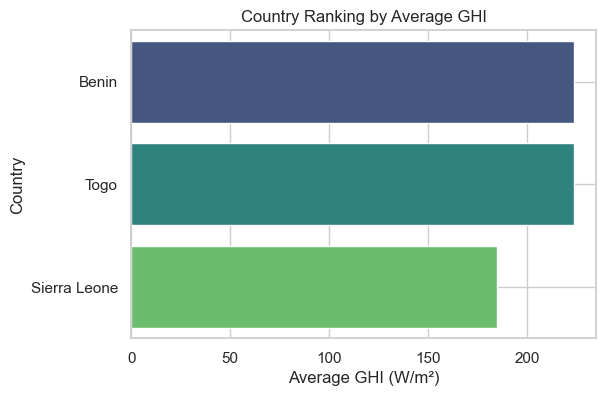

In [19]:
#(Bonus) Visual Ranking of Countries by Average GHI
solar_comparison.plot_ghi_ranking()